In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Fit-a-polynomial-of-degree-m-to-your-training-data,-letting-$m-=-1,-2,-...$.-A-polynomial-of-degree-$m$-has-the-form-$$-p(x,-\textbf{w})-=-w_0-+-w_1x-+-w_2x^2-+-...-+-w_mx^m-$$Fit-by-minimizing-the-mean-squared-error-$E(W)$-via-differentiating-with-respect-to-$\textbf{w}$-and-solving-the-resulting-linear-equation;-this-will-give-the-optimal-weight-vector,-$w^*-$,-with-minimal-error-$-E(w^*)$." data-toc-modified-id="Fit-a-polynomial-of-degree-m-to-your-training-data,-letting-$m-=-1,-2,-...$.-A-polynomial-of-degree-$m$-has-the-form-$$-p(x,-\textbf{w})-=-w_0-+-w_1x-+-w_2x^2-+-...-+-w_mx^m-$$Fit-by-minimizing-the-mean-squared-error-$E(W)$-via-differentiating-with-respect-to-$\textbf{w}$-and-solving-the-resulting-linear-equation;-this-will-give-the-optimal-weight-vector,-$w^*-$,-with-minimal-error-$-E(w^*)$.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Fit a polynomial of degree m to your training data, letting $m = 1, 2, ...$. A polynomial of degree $m$ has the form<br><br> <script type="math/tex; mode=display" id="MathJax-Element-18"> p(x, \textbf{w}) = w_0 + w_1x + w_2x^2 + ... + w_mx^m </script><br>Fit by minimizing the mean squared error $E(W)$ via differentiating with respect to $\textbf{w}$ and solving the resulting linear equation; this will give the optimal weight vector, $w^* $, with minimal error $ E(w^*)$.</a></span></li><li><span><a href="#Create-a-test-set-of-100-data-points-using-same-procedure-used-to-create-training-data.-Using-optimal-weights-for-$m-=-1,-2,-....,$-compute-the-$\text{root-mean-square-error}$-(RMS)-of-your-optimal-polynomial-on-both-the-training-data-and-test-data;-the-RMS-is-defined-by--$$-RMS-=-\sqrt{2/NE(w^*)}-\text{,}-$$-where-$N$-is-the-size-of-the-data-set.-($N$-will-be-different-for-your-training-and-test-sets.)" data-toc-modified-id="Create-a-test-set-of-100-data-points-using-same-procedure-used-to-create-training-data.-Using-optimal-weights-for-$m-=-1,-2,-....,$-compute-the-$\text{root-mean-square-error}$-(RMS)-of-your-optimal-polynomial-on-both-the-training-data-and-test-data;-the-RMS-is-defined-by--$$-RMS-=-\sqrt{2/NE(w^*)}-\text{,}-$$-where-$N$-is-the-size-of-the-data-set.-($N$-will-be-different-for-your-training-and-test-sets.)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create a test set of 100 data points using same procedure used to create training data. Using optimal weights for $m = 1, 2, ....,$ compute the $\text{root-mean-square error}$ (RMS) of your optimal polynomial on both the training data and test data; the RMS is defined by <br><br> <script type="math/tex; mode=display" id="MathJax-Element-25"> RMS = \sqrt{2/NE(w^*)} \text{,} </script> where $N$ is the size of the data set. ($N$ will be different for your training and test sets.)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-can-do-this-a-better-way-by-making-a-numpy-predictions-array-and-taking-advantage-of-numpy's-vectorization/broadcasting" data-toc-modified-id="We-can-do-this-a-better-way-by-making-a-numpy-predictions-array-and-taking-advantage-of-numpy's-vectorization/broadcasting-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>We can do this a better way by making a numpy predictions array and taking advantage of numpy's vectorization/broadcasting</a></span></li></ul></li></ul></li><li><span><a href="#Plot-the-RMS-on-training-and-test-as-a-function-of-$m$.-You-should-then-be-able-to-see-the-optimal-value-of-m-for-fitting-your-data;-the-optimal-choice-will-have-a-small-error,-small-$\text{model-complexity}$-(low-degree),-and-decent-$-\text{generalization}-$-(low-test-error)" data-toc-modified-id="Plot-the-RMS-on-training-and-test-as-a-function-of-$m$.-You-should-then-be-able-to-see-the-optimal-value-of-m-for-fitting-your-data;-the-optimal-choice-will-have-a-small-error,-small-$\text{model-complexity}$-(low-degree),-and-decent-$-\text{generalization}-$-(low-test-error)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot the RMS on training and test as a function of $m$. You should then be able to see the optimal value of m for fitting your data; the optimal choice will have a small error, small $\text{model complexity}$ (low degree), and decent $ \text{generalization} $ (low test error)</a></span></li><li><span><a href="#Based-on-the-chart,-the-best-tradeoff-b/w-simplicity-and-minimal-error-is-picking-a-3rd-degree-polynomial.-Let's-see-it's-exact-error-and-plot-it-with-the-training-data" data-toc-modified-id="Based-on-the-chart,-the-best-tradeoff-b/w-simplicity-and-minimal-error-is-picking-a-3rd-degree-polynomial.-Let's-see-it's-exact-error-and-plot-it-with-the-training-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Based on the chart, the best tradeoff b/w simplicity and minimal error is picking a 3rd degree polynomial. Let's see it's exact error and plot it with the training data</a></span></li><li><span><a href="#Let's-see-the-RMSE-we-get-for-the-optimal-degree-polynomial-$(m-=-3$)-on-the-test-data-and-plot-the-resulting-polynomial-against-the-actual-data" data-toc-modified-id="Let's-see-the-RMSE-we-get-for-the-optimal-degree-polynomial-$(m-=-3$)-on-the-test-data-and-plot-the-resulting-polynomial-against-the-actual-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Let's see the RMSE we get for the optimal degree polynomial $(m = 3$) on the test data and plot the resulting polynomial against the actual data</a></span></li></ul></div>

# Fit a polynomial of degree m to your training data, letting $m = 1, 2, ...$. A polynomial of degree $m$ has the form<br><br> $$ p(x, \textbf{w}) = w_0 + w_1x + w_2x^2 + ... + w_mx^m $$<br>Fit by minimizing the mean squared error $E(W)$ via differentiating with respect to $\textbf{w}$ and solving the resulting linear equation; this will give the optimal weight vector, $w^* $, with minimal error $ E(w^*)$.


   3     2
3 x + 5 x + 100 x + 9


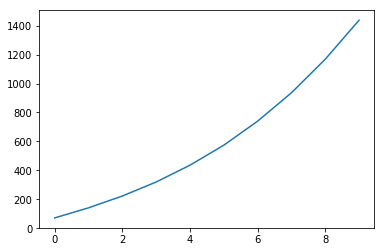

In [2]:
def gen_data_set(size, mu, sigma):
    noise = np.random.normal(loc=mu, scale=sigma, size=size)
    x = .6*np.linspace(1, size, num=size)
    p = np.poly1d([3, 5, 100, 9])
    print(np.poly1d(p))
    y_without_noise = [p(x_i) for x_i in x]
    y = y_without_noise + noise
    plt.plot(y)
    plt.show()
    return [x, y]

mu, sigma = 0, .25
x_train, y_train = gen_data_set(size=10, mu=mu, sigma=sigma)

In [3]:
# Building matrix for left side of nonnormalized equation
# letting m = n  <------- ???
def get_weights(x_train, y_train, m):
    n = len(x_train)
    if len(y_train) != n:
        print('Need same amt of y values as data points')
        return;
    
    if m == 0:
        return []
    
    m = n-1 if m >= n else m
        
    left_matrix = []
    right_matrix = []
    
    extra = 0
    for r in range(0, m): # Builds matrix
        left_row = []

        for c in range(0+extra, m+extra): # Builds a row 
            left_value = 0

            for i in range(n): # Gives single element of row 
                left_value += x_train[i] ** c

            left_row.append(left_value)

        left_matrix.append(left_row)
        extra += 1

    for r in range(0, m): # Builds whole right matrix
        right_value = 0
        for i in range(n): # builds only value in row of right matrix
            right_value += x_train[i] ** r * y_train[i]
        right_matrix.append([right_value])

    left_matrix = np.matrix(left_matrix)
    right_matrix = np.matrix(right_matrix)

    # Will solve the resulting linear equation with numpy.linalg.solve
    w_star = np.linalg.solve(left_matrix, right_matrix)
    return w_star

# Create a test set of 100 data points using same procedure used to create training data. Using optimal weights for $m = 1, 2, ....,$ compute the $\text{root-mean-square error}$ (RMS) of your optimal polynomial on both the training data and test data; the RMS is defined by <br><br> $$ RMS = \sqrt{2/NE(w^*)} \text{,} $$ where $N$ is the size of the data set. ($N$ will be different for your training and test sets.)

   3     2
3 x + 5 x + 100 x + 9


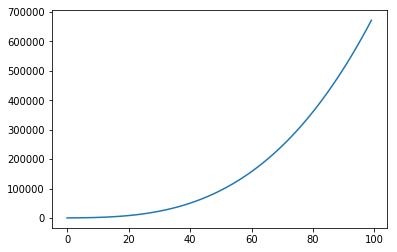

In [4]:
x_test, y_test = gen_data_set(size=100, mu=mu, sigma=sigma)

In [5]:
def p(x_scalar, w):
    # Need to use [0,0] to get actual value b/c we are dealing with
    # np.matrix type
    prediction = sum([x_scalar**m * w[m] for m in range(len(w))])
    if isinstance(prediction,np.matrix):
        return prediction[0,0]
    else:
        return prediction

def ms(x_vec, y, w):
    return .5 * sum([(p(x_vec[i], w) - y[i]) ** 2 for i in range(len(x_vec))])

def rmse(x_vec, y, w):
    if(len(w) == 0 or len(x_vec) == 0 or len(y) == 0):
        return np.inf
    # Need to use [0,0] b/c we are dealing with a matrix
    return np.sqrt(2/len(x_vec) * ms(x_vec, y, w))

### We can do this a better way by making a numpy predictions array and taking advantage of numpy's vectorization/broadcasting

In [6]:
def rmse_better(predictions, targets):
    return np.sqrt(np.mean((predictions-targets)**2))

# Plot the RMS on training and test as a function of $m$. You should then be able to see the optimal value of m for fitting your data; the optimal choice will have a small error, small $\text{model complexity}$ (low degree), and decent $ \text{generalization} $ (low test error)

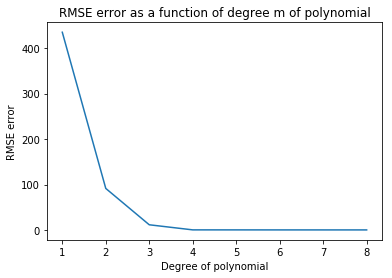

In [7]:
# In order to make RMSE a function of m (the degree of polynomial), we will make weights for 
# the degrees we wish to remove 0

rmses = []
for degree in range(0, len(x_train) - 1):
    rmses.append(rmse(x_train, y_train, get_weights(x_train, y_train, degree)))

plt.plot(rmses)
plt.title('RMSE error as a function of degree m of polynomial')
plt.xlabel('Degree of polynomial')
plt.ylabel('RMSE error')
plt.show()

# Based on the chart, the best tradeoff b/w simplicity and minimal error is picking a 3rd degree polynomial. Let's see it's exact error and plot it with the training data

In [8]:
optimal_degree = 3
print('RMSE for optimal degree polynomial on training data:', 
      rmse(x_train, y_train, 
           get_weights(x_train, y_train, optimal_degree)))

RMSE for optimal degree polynomial on training data: 11.42693636


In [9]:
def plot_with_degree(x_train, y_train, degree, xlabel='', ylabel='', title=''):
    w_star = get_weights(x_train, y_train, degree)
    predictions = [p(x_train[i], w_star) for i in range(len(x_train))]
    plt.plot(predictions, 'b', label='predictions')
    plt.plot(y_train, 'r', label='targets')
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

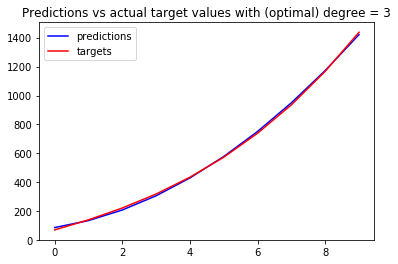

In [10]:
plot_with_degree(x_train, y_train, optimal_degree, 
                 title='Predictions vs actual target values with (optimal) degree = ' + str(optimal_degree))

# Let's see the RMSE we get for the optimal degree polynomial $(m = 3$) on the test data and plot the resulting polynomial against the actual data

In [11]:
print('RMSE for optimal degree polynomial on test data:', 
      round(rmse(x_test, y_test, 
           get_weights(x_test, y_test, optimal_degree)),2))

RMSE for optimal degree polynomial on test data: 12237.49


Doesn't seem like that bad of error. The error for the training data was ~0.25. We would expect that the error on the test data would be a bit larger than the training data. Not sure if 3x the error would be considered too much of a difference

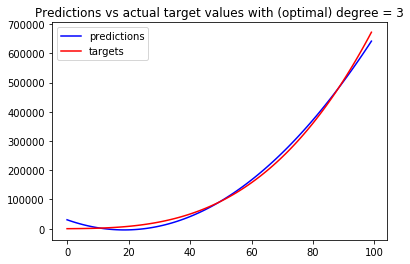

In [12]:
plot_with_degree(x_test, y_test, optimal_degree, 
                 title='Predictions vs actual target values with (optimal) degree = ' + str(optimal_degree))